In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [230]:
df=pd.read_csv(r"C:\Users\Nehad\Downloads\zomato.csv",encoding="unicode_escape")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


### Considering only Indian Restaurants in this analysis

In [231]:
df=df[df["Country Code"]==1]

# Question 1(1.)

In [43]:
def f(s):
    if s!="New Delhi" and s!="Noida" and s!="Ghaziabad" and s!="Gurgaon" and s!="Faridabad":
        return "Rest of India"
    else:
        return "Delhi-NCR"
    
df["Final_city"]=df.City.apply(f)

C:\Users\Nehad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


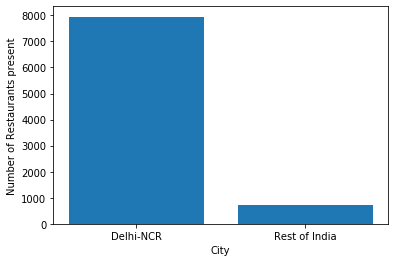

In [49]:
city=df.Final_city.value_counts().index
count=df.Final_city.value_counts().values
plt.bar(city,count)
plt.xlabel("City")
plt.ylabel("Number of Restaurants present")
plt.show()

### For Plotting the bar graph of number of restaurants present in Delhi NCR vs Rest of India, I proceeded with the following steps-
1.First filtered the restaurants based on their country code(The rows which have country code as 1 is included in the dataframe df)
2.Made another column with name final_city by applying a function on the column City(This function either returns "Delhi-NCR" or "Rest of India" based on the value present in City column of Respective row)
3.Plotted the bar-Graph by applying value_counts function on the newly made column "Final_city".

# Question 1(2.)

In [79]:
s1=set() # set of cuisines available in Delhi-NCR)
delhi_cuisines=df[df.Final_city=="Delhi-NCR"].Cuisines.str.split(",")
delhi_cuisines.values
for i in delhi_cuisines.values:
    for j in i:
        j=j.strip()
        s1.add(j)
s2=set() # set of cuisines available in Rest of India
rest_india=df[df.Final_city=="Rest of India"].Cuisines.str.split(",")
for i in rest_india.values:
    for j in i:
        j=j.strip()
        s2.add(j)
cuisines_not_delhi_ncr=s2.difference(s1) # Cuisines not present in delhi-ncr but available in Rest of India(Through info of Dataset)
print(cuisines_not_delhi_ncr)

{'Cajun', 'Malwani', 'BBQ', 'German'}


In [83]:
s3=set() # Cuisines present in delhi-Ncr according to zomato-API
import requests
import json

r=requests.get("https://developers.zomato.com/api/v2.1/cuisines",headers={"user-key": "399720f6f904f106e162cd2bd0011a6f","Accept": "application/json"},params={"city_id":1})
data=r.json()
for i in data["cuisines"]:
    s3.add(i["cuisine"]["cuisine_name"])
s2.difference(s3).intersection(cuisines_not_delhi_ncr)  #cuisines which are not present in delhi-ncr but are available in rest of india according to zomato api


{'Cajun', 'German'}

### For Finding  the cuisines which are not present in restaurant of Delhi NCR but present in rest of India,I proceeded with the following steps-
1)first made a set of cuisines which are present in the restaurants of Delhi-NCR through the information available in dataset
2)made a set of cuisines present in rest of india (info through dataset)
3)calculated the set of cuisines which are present in rest of India but not present in Delhi-NCR(This set is made through the info of dataset
4)imported requests and json and made a api call to the zomato api at the required endpoint giving the info of cuisines present Delhi-NCR by passing city_code as parameter and making a set out of that information
5)finally calculated the actual cuisines which are present in rest of india but not present in delhi-NCR
Conclusion-The dataset given is incomplete

# Question 1(3.)

In [97]:
# top 10 cuisines served by maximum number of restaurants in Delhi NCR 
d={}
data=df[df.Final_city=="Delhi-NCR"].Cuisines.str.split(",",expand=True)
for i in range(8):
    list=data[i].values
    for j in list:
        if j is not None:
            j=j.strip()
            d[j]=d.get(j,0)+1
dictionary=dict(sorted(d.items(),key=lambda i:i[1],reverse=True))
count=0
for i in dictionary:
    if count!=10:
        print(i,d[i])
        count=count+1

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


In [96]:
# top 10 cuisines served by maximum number of restaurants in Rest of India
d2={}
data=df[df.Final_city=="Rest of India"].Cuisines.str.split(",",expand=True)
for i in range(8):
    list=data[i].values
    for j in list:
        if j is not None:
            j=j.strip()
            d2[j]=d2.get(j,0)+1
dictionary2=dict(sorted(d2.items(),key=lambda i:i[1],reverse=True))
count=0
for i in dictionary2:
    if count!=10:
        print(i,d2[i])
        count=count+1

North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


### For Finding the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India,I proceeded with the following steps-
#### 1)Created a dictionary of cuisines served in Delhi-NCR(/Rest of India) where key is the cuisine name and value is the number of restaurants serving that respective cuisine
#### 2)Sorted the dictionary according to the value of dictionary in descending order and then printed the first 10 items of the dictionary

# Question 1(4.)

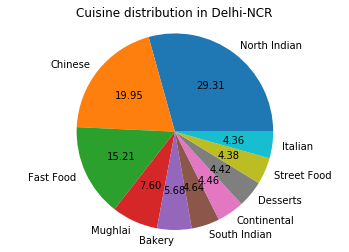

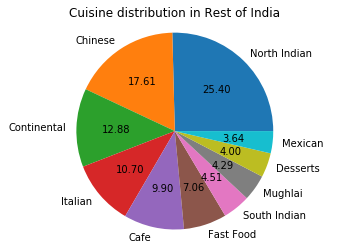

In [104]:
count=0
list1=[]
list2=[]
for i in dictionary:
    if count!=10:
        list1.append(i)
        list2.append(dictionary[i])
        count=count+1
plt.pie(list2,labels=list1,autopct="%.2f")
plt.axis("equal")
plt.title("Cuisine distribution in Delhi-NCR")
plt.show()

count1=0
list3=[]
list4=[]
for i in dictionary2:
    if count1!=10:
        list3.append(i)
        list4.append(dictionary2[i])
        count1=count1+1
plt.pie(list4,labels=list3,autopct="%.2f")
plt.axis("equal")
plt.title("Cuisine distribution in Rest of India")
plt.show()
    

### Analysis-
#### The list of top 10 cuisines in delhi-NCR and Rest of India clearly shows that south-indian food and mughlai is quite famous in delhi-ncr as compared to Rest of India.However north-indian food remains the top priority in both the regions
#### Also there is much more demand for mexican food in rest of india as compared to delhi-ncr
#### Explanation-
#### 1.Simply used dictionary to plot the respective pie charts and customizing each chart by explicitly showing the percentage and labels by putting them as parameter

# Question 2(1.)(1.)

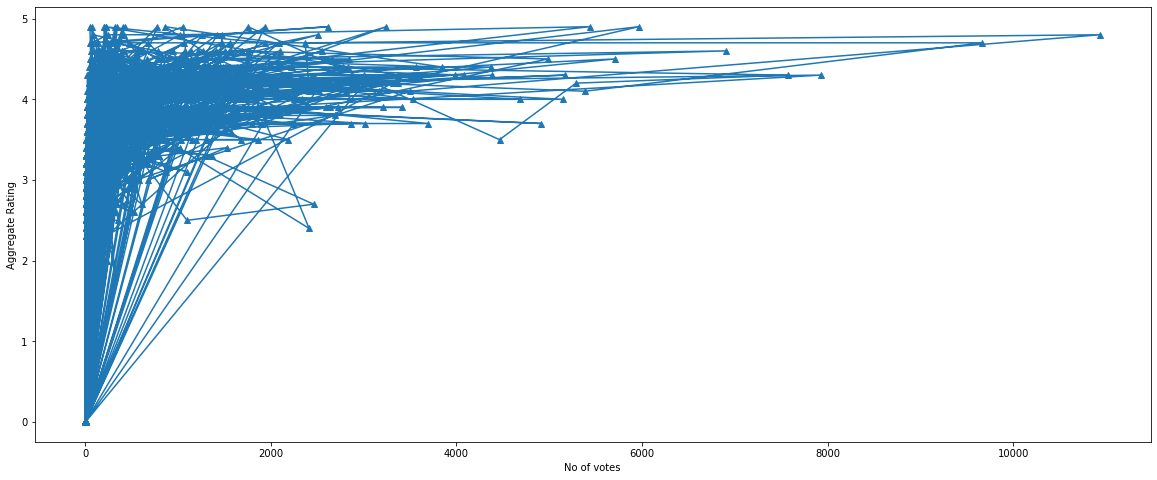

In [134]:
plt.figure(figsize=(20,8))
rating=df["Aggregate rating"].values
votes=df["Votes"].values
plt.plot(votes,rating,marker="^")
plt.xlabel("No of votes")
plt.ylabel("Aggregate Rating")
plt.show()

### Analysis-
#### The graph clearly shows that the aggregate rating is directly proportional to the number of votes i.e more the votes more is the aggregate rating 
### Explanation-
#### To get with a brief analysis ,I tried to plot the graph between the  list of number of votes and list of aggregate rating.For making the graph more explicit i changed the dimension of the figure and also used the marker parameter while plotting

# Question 2(1.)(2.)

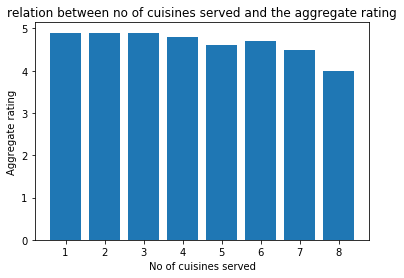

In [145]:
rating=df["Aggregate rating"].values
list_of_cuisines=df["Cuisines"].str.split(",").values
list_no_of_cuisines=[]
for i in list_of_cuisines:
    list_no_of_cuisines.append(len(i))
plt.bar(list_no_of_cuisines,rating)
plt.xlabel("No of cuisines served")
plt.ylabel("Aggregate rating")
plt.title("relation between no of cuisines served and the aggregate rating")
plt.show()

### Analysis-
#### It can be clearly seen that the restaurants serving less cuisines have higher rating than the restaurants serving more number of cuisines or it can also be said that the restaurants which are more diverse in their cuisine have comparitively lesser rating as compared to those restaurants who focus on serving less cuisines(which is their speciality)
### Explanation-
#### 1)Made a list of no of cuisines served using the split function on the column cuisines
#### 2)I consciously chose bar graph because it will give a more explicit and clear expalanation for the trend unlike the scatter plot 

# Question 2(1.)(3.)

C:\Users\Nehad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


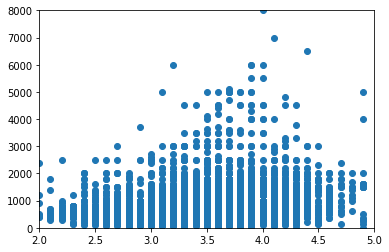

In [154]:
df.dropna(inplace=True)
rating=df["Aggregate rating"].values
cost=df["Average Cost for two"].values
plt.scatter(rating,cost)
plt.axis([2,5,0,8000])
plt.show()

### Analysis-It can be clearly seen that the restaurants having moderate cost are having higher rating

Average rating of restaurants serving one cuisine :  2.0550855666774277


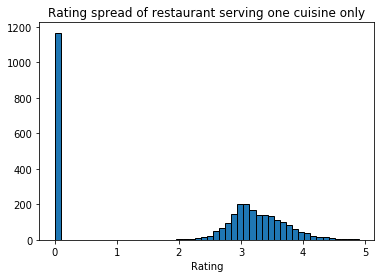

Average rating of restaurants serving one cuisine :  2.784374437443748


In [249]:
#question2(1)(4)
df3 = df.copy()
df3.Cuisines.fillna('Not Known',inplace=True)
df4 = df3[~df3['Cuisines'].str.contains(',')] # ~ for not condition
df5 = df3[df3['Cuisines'].str.contains(',')]
print("Average rating of restaurants serving one cuisine : ",df4['Aggregate rating'].mean())

plt.hist(df4['Aggregate rating'],bins=50, edgecolor='black')
plt.title('Rating spread of restaurant serving one cuisine only')
plt.xlabel("Rating")
plt.show()
print("Average rating of restaurants serving one cuisine : ",df5['Aggregate rating'].mean())




# Question 2(2.)

In [186]:
grouped_data=df.groupby("Locality")
d={}
for i,j in grouped_data:
    Total_votes=j["Votes"].sum()
    w=(j["Votes"]*j["Aggregate rating"]).sum()
    Waggregate_rating=w/Total_votes
    d[i]=Waggregate_rating
dictionary=dict(sorted(d.items(),key=lambda i:i[1],reverse=True))
count=0
for i in dictionary:
    if count!=10:
        print(i,dictionary[i])
        count=count+1

    


C:\Users\Nehad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


Aminabad 4.9
Hotel Clarks Amer, Malviya Nagar 4.9
Friends Colony 4.886916367367881
Arambol 4.6
Gandhipuram 4.6
Anjuna 4.5446681580909765
Arera Colony 4.385168539325843
Acropolis Mall, Kasba  4.3845703125
12th Square Building, Banjara Hills 4.3
Anil Plaza, Christian Basti 4.265782493368699


### Explanation- To Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating, I proceded with the following steps-
#### 1)Grouped the dataframe on the basis of column "Locality"and applied the loop on it calculating the sum of voted on the froped data and other things as were required in the formula
#### 2) Made a dictionary where key was the locality name and value was the weighted restaurant rating.Sorted the dictionary in descending order according to the weighted restaurant rating and printed the first 10 items of the dictionary
    

# Question 3(1.)

C:\Users\Nehad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


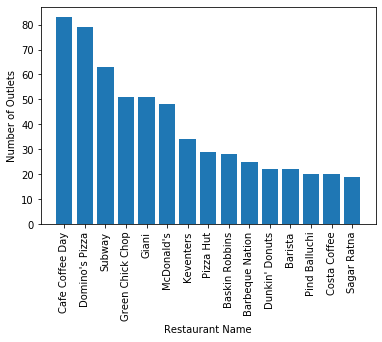

In [196]:
df["Restaurant Name"]=df["Restaurant Name"].str.replace("Giani's","Giani") # replaced the 2 almost same looking word with a single word
restaurant_name=df["Restaurant Name"].value_counts().index[0:15]
no_of_outlets=df["Restaurant Name"].value_counts().values[0:15]
plt.bar(restaurant_name,no_of_outlets)
plt.xticks(rotation=90)
plt.xlabel("Restaurant Name")
plt.ylabel("Number of Outlets")
plt.show()

### Explanation-To Plot the bar graph top 15 restaurants have a maximum number of outlets.I proceded with the following steps-
#### 1) First calculated the restaurant with the no of outlets using the value_counts function which gives the result in descending order
#### 2) Plotted the bargraph with restaurant name on x-axis and total number of outlet of that respective restaurant on the y-axis


# Question 3(2.)

C:\Users\Nehad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


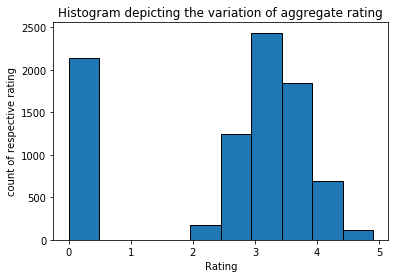

In [208]:
df.dropna(subset=["Aggregate rating"],inplace=True)
aggregate_rating=df["Aggregate rating"].values
plt.hist(aggregate_rating,edgecolor="black")
plt.xlabel("Rating")
plt.ylabel("count of respective rating")
plt.title("Histogram depicting the variation of aggregate rating")
plt.show()

### Explanation-To Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant),I proceded with the following steps-
#### 1)First removed the rows which had NaN values in the column "aggregate rating".
#### 2)plotted the histogram of the aggregate rating using the plt.hist function

# Question 3(3.)

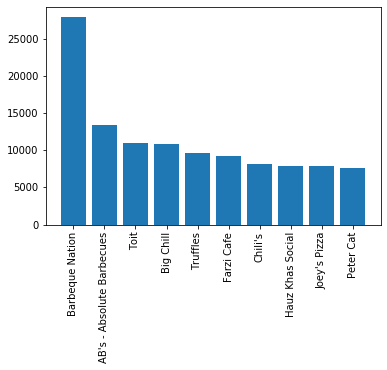

In [223]:
d={}
list_rest=df["Restaurant Name"].values
for i in range(len(list_rest)):
    d[list_rest[i]]=df["Votes"].values[i]+d.get(list_rest[i],0)
dictionary=dict(sorted(d.items(),key=lambda i:i[1],reverse=True))
count=0
list1=[]
list2=[]
for i in dictionary:
    if count!=10:
        list1.append(i)
        list2.append(dictionary[i])
        count=count+1
plt.bar(list1,list2)
plt.xticks(rotation=90)
plt.show()

### Explanation-
#### 1) Made a dictionary where key is the restaurant name and value is the total no of votes given to that respective restaurant
#### 2)Sorted the dictionary by value in descending order and plotted the bargraph of the first 10 restaurants occuring in the sorted dictionary

# Question 3(4.)

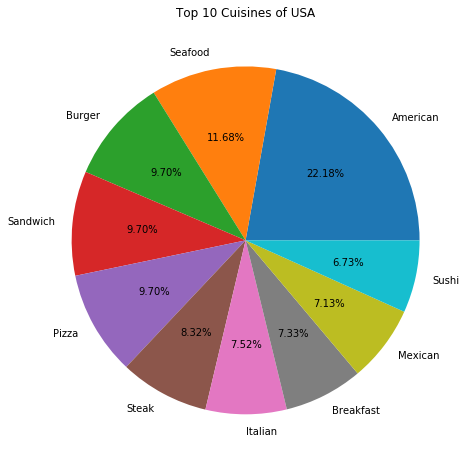

In [229]:
# Extracting Cuisine names and restaurant names having country USA
table=df[['Cuisines','Restaurant Name']][df['Country Code']==216]
us_cuisines={}
# Creating The dictionary
for i in table['Cuisines']:
    i=str(i)
    array=i.strip().split(',')
    for a in array:
        if a.strip() in us_cuisines:
            us_cuisines[a.strip()]+=1
        else:
            us_cuisines[a.strip()]=1
# Sorting the values
sorted_values=sorted(us_cuisines,key=us_cuisines.get,reverse=True)[0:10]
size_array=[]
# Taking it in an array
for i in sorted_values:
    size_array.append(us_cuisines[i])
# Plotting the graph
plt.figure(figsize=(8,8))
plt.title("Top 10 Cuisines of USA")
plt.pie(size_array,labels=sorted_values,autopct="%.2f%%")
plt.show()

### Explanation-
#### 1) First created a dictionary where key is the cuisine name of usa and value is the number of restaurants serving it
#### 2)Sorted the dictionary in descending order by value and plotted the pie chart of the first 10 items of the dictionary

# Question 3(5.)

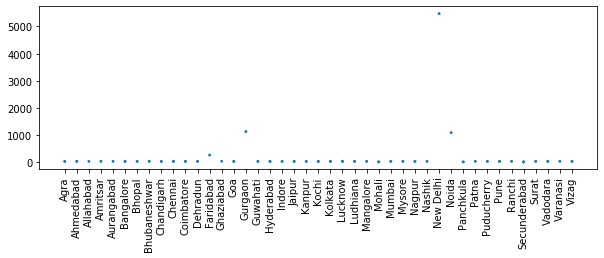

In [243]:
plt.figure(figsize=(10,3))
grouped_df=df.groupby("City")
city_list=[]
weighted_list=[]
no_rest_list=[]

for i,j in grouped_df:
    total_votes=j["Votes"].sum()
    weighted=(j["Votes"]*j["Aggregate rating"]).sum()
    weighted_rating=weighted/total_votes
    city_list.append(i)
    weighted_list.append(weighted_rating)
    no_rest_list.append(len(j))
plt.scatter(city_list,no_rest_list,s=weighted_list)
plt.xticks(rotation=90)
plt.show()
    
    

### Explanation-
#### 1)Grouped the dataframe according to city and calculated the weighted rating of each city and no of restraunts present in that city and the total no of votes
#### 2)Plotted the buuble chart by using plt.scatter and giving parameter s=wighted list so that the bubble chart is produced